## 제품사진으로 제품분류 모델(과일 이미지 분류)

- 기간 : 23.03.16 ~ 23.03.17
- 데이터셋 : 캐글 https://www.kaggle.com/
- 운영체제 : Window
- 프레임워크 : Sklearn
- 개발도구 : Jupyter notebook
- 마트에 존재하는 제품사진을 이미지를 학습해 어떤제품인지 분류해주는 모델생성 후 제품의 이미지 
  입력 시 예측 데이터를 보여주도록 테스트 웹페이지 생성

In [1]:
# 파일 목록만들기

import os
import matplotlib.pyplot as plt

filepath = 'data\\train'
fruit_list = os.listdir('data\\train')

fruit_list

['apple', 'banana', 'kiwi', 'lemon', 'mango', 'orange', 'pear', 'watermelon']

In [2]:
from PIL import Image
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# x 데이터 생성
def data_x(path):

    x_data = np.array([[0]*6400])

    for i in range(len(fruit_list)):
        for img in os.listdir(path+'\\'+fruit_list[i]):
            image = Image.open(path+'\\'+fruit_list[i]+'\\'+img).convert('L')
            image = image.resize((80,80), Image.ANTIALIAS)
            x_data= np.concatenate((x_data,np.array(image).reshape(1,-1)),axis=0)

    x_data = x_data[1:]

    return x_data



# y 데이터 생성

def data_y(path):
    
    label = np.array([])
    for i in range(len(fruit_list)):
        cnt = len(os.listdir(path+'\\'+fruit_list[i]))
        label = np.append(label, np.array([i]*cnt))

    label = label.astype('int')


    return label
    

In [3]:
# train, test 데이터 생성

x_train = data_x('data\\train')
y_train = data_y('data\\train')
x_test = data_x('data\\test')
y_test = data_y('data\\test')

len(x_train),len(y_train),len(x_test),len(y_test)

(470, 470, 63, 63)

In [4]:
# 이미지 정규화
x_train = x_train/255
x_test = x_test/255

In [5]:
# 최적의 모델찾기 ==> DecisionTreeClassifier, RandomForestClassifier 선택

from sklearn.utils import all_estimators

rets=all_estimators(type_filter='classifier')

result=[]

for name, estimator_ in rets:
    try:
        model=estimator_()
        model.fit(x_train,y_train)
        sc=model.score(x_train,y_train)
        result.append((name, round(sc, 2)))
    except Exception:
        pass

sorted(result, key=lambda x : x[1], reverse=True)

[('DecisionTreeClassifier', 1.0),
 ('ExtraTreeClassifier', 1.0),
 ('ExtraTreesClassifier', 1.0),
 ('GaussianProcessClassifier', 1.0),
 ('GradientBoostingClassifier', 1.0),
 ('HistGradientBoostingClassifier', 1.0),
 ('LabelPropagation', 1.0),
 ('LabelSpreading', 1.0),
 ('LinearSVC', 1.0),
 ('QuadraticDiscriminantAnalysis', 1.0),
 ('RadiusNeighborsClassifier', 1.0),
 ('RandomForestClassifier', 1.0),
 ('RidgeClassifier', 1.0),
 ('RidgeClassifierCV', 1.0),
 ('BaggingClassifier', 0.98),
 ('LogisticRegression', 0.98),
 ('CalibratedClassifierCV', 0.95),
 ('LinearDiscriminantAnalysis', 0.95),
 ('NuSVC', 0.88),
 ('PassiveAggressiveClassifier', 0.8),
 ('MLPClassifier', 0.74),
 ('SVC', 0.71),
 ('LogisticRegressionCV', 0.69),
 ('SGDClassifier', 0.63),
 ('KNeighborsClassifier', 0.53),
 ('Perceptron', 0.47),
 ('GaussianNB', 0.43),
 ('AdaBoostClassifier', 0.38),
 ('MultinomialNB', 0.33),
 ('NearestCentroid', 0.33),
 ('ComplementNB', 0.3),
 ('CategoricalNB', 0.26),
 ('BernoulliNB', 0.16),
 ('DummyClas

In [6]:
# DecisionTreeClassifier 최적의 파라미터 찾기ㄴ

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=2)
params = {'criterion':['gini','entropy'], 'max_depth':[None,2,3,4,5,6]}
dtc_grid = GridSearchCV(dtc, param_grid=params, scoring='accuracy')
dtc_grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6]},
             scoring='accuracy')

In [7]:
dtc_grid.best_params_, dtc_grid.best_score_

({'criterion': 'entropy', 'max_depth': 6}, 0.39148936170212767)

In [8]:
best_dtc = dtc_grid.best_estimator_
best_dtc.fit(x_train,y_train)
best_dtc.score(x_train,y_train)

0.7574468085106383

In [9]:
# 정확도 측정

from sklearn.metrics import accuracy_score

y_pred = best_dtc.predict(x_test)

accuracy_score(y_test, y_pred)

0.7619047619047619

In [10]:
# 모델저장
import joblib

# joblib.dump(best_dtc, 'cgi-bin//best_dtc.pkl')

In [11]:
# DecisionTreeClassifier 기본 모델 생성
basic_dtc = DecisionTreeClassifier(random_state=2)
basic_dtc.fit(x_train,y_train)
basic_dtc.score(x_train,y_train)

1.0

In [32]:
# 모델저장

# joblib.dump(basic_dtc, 'cgi-bin//basic_dtc.pkl')

['cgi-bin//basic_dtc_1.pkl']

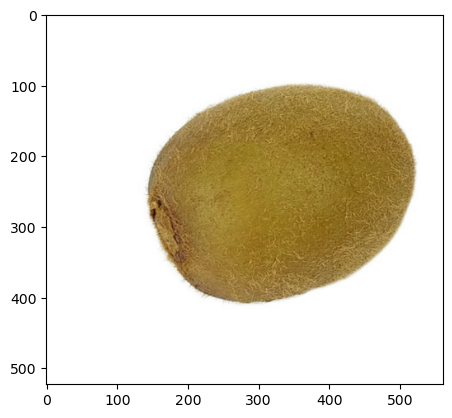

In [27]:
# 예측하기
sample = Image.open('kiwi.jpg')

plt.imshow(sample)

sample = sample.convert('L')
sample = sample.resize((80,80), Image.ANTIALIAS)
sample_data= np.array(sample).reshape(1,-1)
sample_data = sample_data/255

In [28]:
best_dtc_pred = best_dtc.predict(sample_data)
basic_dtc_pred = basic_dtc.predict(sample_data)

print(f'DecisionTreeClassifier 최적의 파라미터 모델 예측 :  {fruit_list[best_dtc_pred[0]]}')
print(f'DecisionTreeClassifier 최적의 파라미터 모델 예측 :  {fruit_list[basic_dtc_pred[0]]}')

DecisionTreeClassifier 최적의 파라미터 모델 예측 :  watermelon
DecisionTreeClassifier 최적의 파라미터 모델 예측 :  kiwi


In [16]:
# RandomForestClassifier 최적의 파라미터 찾기

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=2)
params = {'n_estimators':[75,100,115],'max_depth':[None,5, 8, 10, 12],'min_samples_leaf':[1,3,5,7],'min_samples_split':[2,4,6]}
rfc_grid = GridSearchCV(rfc, param_grid=params, scoring='accuracy',cv=5)
rfc_grid.fit(x_train,y_train)

rfc_grid.best_params_, rfc_grid.best_score_

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 115},
 0.5297872340425531)

In [17]:
best_rfc = rfc_grid.best_estimator_
best_rfc.fit(x_train,y_train)
best_rfc.score(x_train,y_train)

1.0

In [18]:
# 정확도 측정
y_pred = best_rfc.predict(x_test)

accuracy_score(y_test,y_pred)

0.9365079365079365

In [35]:
# 모델저장
# joblib.dump(basic_rfc, 'cgi-bin//best_rfc.pkl')

['cgi-bin//best_rfc.pkl']

In [20]:
# RandomForestClassifier 기본 모델 생성

basic_rfc = RandomForestClassifier(random_state=2)
basic_rfc.fit(x_train,y_train)
basic_rfc.score(x_train,y_train)

1.0

In [21]:
y_pred = basic_rfc.predict(x_test)

accuracy_score(y_test,y_pred)

0.9365079365079365

In [36]:
# 모델저장
# joblib.dump(basic_rfc, 'cgi-bin//basic_rfc.pkl')

['cgi-bin//basic_rfc.pkl']

RandomForestClassifier 최적의 파라미터 모델 예측 :  kiwi
RandomForestClassifier 최적의 파라미터 모델 예측 :  kiwi


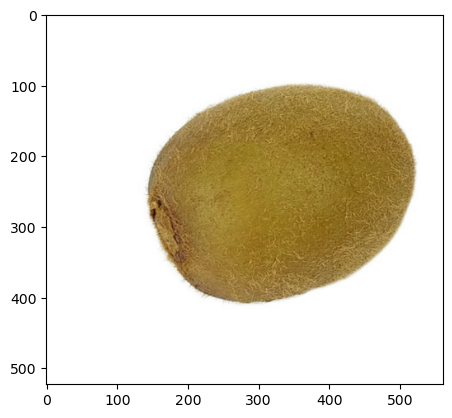

In [29]:
# 예측하기
sample = Image.open('kiwi.jpg')

plt.imshow(sample)

sample = sample.convert('L')
sample = sample.resize((80,80), Image.ANTIALIAS)
sample_data= np.array(sample).reshape(1,-1)
sample_data = sample_data/255


best_rfc_pred = best_rfc.predict(sample_data)
basic_rfc_pred = basic_rfc.predict(sample_data)

print(f'RandomForestClassifier 최적의 파라미터 모델 예측 :  {fruit_list[best_rfc_pred[0]]}')
print(f'RandomForestClassifier 최적의 파라미터 모델 예측 :  {fruit_list[basic_rfc_pred[0]]}')